# Exploratory Data Analysis
## CFPB Complaints

The purpose of this project is to download and explore a dataset using Python and associated libraries.

The dataset is about consumer complaints about finacial products and services collected by the Consumer Financial Protection Bureau (CFPB). The data can be downloaded from the [data.gov](https://www.data.gov) website which hosts the U.S Government's open data.

### Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',1000) # Show complete text in dataframe without truncating.

### Gather

Downloaded dataset manually as a csv file and saved it locally as the file is too large and is causing app to crash when I download automatically using the requests library. (should check this out to see why)

In [3]:
# Read csv file into Pandas DataFrame suing chunksize due to memory issue (csv file is ~ 450 Mb)
'''
complaints_df = pd.read_csv('Consumer_Complaints.csv', index_col=0, parse_dates=['Date received', 'Date sent to company'],\
            infer_datetime_format=True)
'''

In [4]:
#Rename column and index names.
col_names = ['Product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_ID']

complaints_df.columns = col_names
complaints_df.index.name = 'date_received'

In [5]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932473 entries, 2014-03-12 to 2016-08-19
Data columns (total 17 columns):
Product                         932473 non-null object
sub_product                     697303 non-null object
issue                           932473 non-null object
sub_issue                       450184 non-null object
consumer_complaint_narrative    227328 non-null object
company_public_response         271533 non-null object
company                         932473 non-null object
state                           922555 non-null object
zip                             918556 non-null object
tags                            129864 non-null object
consumer_consent_provided?      410778 non-null object
submitted_via                   932473 non-null object
date_sent_to_company            932473 non-null datetime64[ns]
company_response_to_consumer    932473 non-null object
timely_response?                932473 non-null object
consumer_disputed?              768570 n

In [6]:
complaints_df.index

DatetimeIndex(['2014-03-12', '2016-10-01', '2016-10-17', '2014-06-08',
               '2014-09-13', '2013-11-13', '2015-06-16', '2015-06-15',
               '2015-11-13', '2014-10-21',
               ...
               '2015-09-17', '2014-02-11', '2016-11-09', '2016-01-22',
               '2017-01-26', '2017-04-10', '2017-02-07', '2017-01-04',
               '2015-09-28', '2016-08-19'],
              dtype='datetime64[ns]', name='date_received', length=932473, freq=None)

In [7]:
complaints_df.sample(5)

,Product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_ID
date_received,,,,,,,,,,,,,,,,,
2014-04-02,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34711,NaN,NaN,Web,2014-04-02,Closed with non-monetary relief,Yes,No,789277
2016-12-29,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,NaN,NaN,"EQUIFAX, INC.",FL,32244,NaN,NaN,Postal mail,2016-12-30,Closed with explanation,Yes,No,2269092
2012-02-18,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,PNC Bank N.A.,PA,15825,NaN,NaN,Referral,2012-02-23,Closed without relief,Yes,No,24824
2013-11-22,Credit card,NaN,Privacy,NaN,NaN,NaN,"CITIBANK, N.A.",FL,32129,NaN,NaN,Web,2013-11-27,Closed with explanation,Yes,No,608522
2015-09-30,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",MN,55811,NaN,NaN,Referral,2015-10-02,Closed with monetary relief,Yes,No,1586765


### Univariate Analysis
In this section, I will explore variables individually.

In [8]:
complaints_df.shape # Dataframe has 17 columns and 932,473 rows.

(932473, 17)

In [9]:
products = pd.DataFrame(complaints_df.Product.value_counts().reset_index())
products.columns = ['product', 'complaints']
products.count()

product       18
complaints    18
dtype: int64

Text(0.5,1,'Product Complaints')

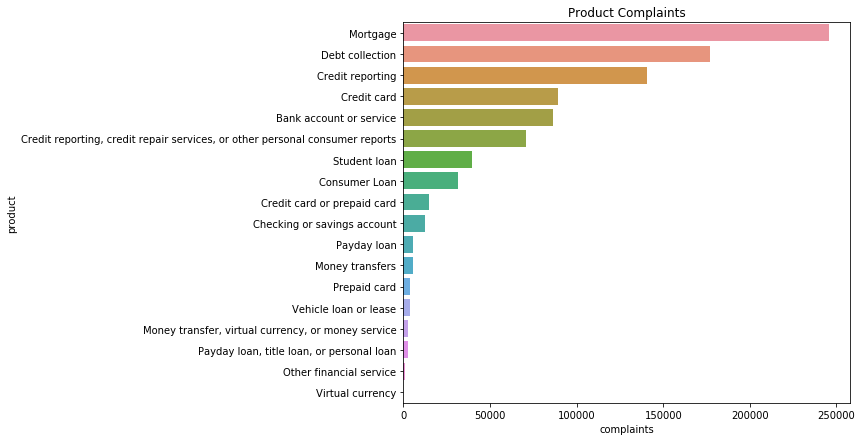

In [10]:
plt.figure(figsize=(8, 7))
sns.barplot(x='complaints', y='product', data=products)
plt.title('Product Complaints')

Grouping the complaints by product, we can see that most complaints are about Mortgages, with debt collection and credit reporting taking 2nd and 3rd place respectively.

Complaints are then further divided into sub_products. Debt collection further sub divided into 17 sub_product categories while Credit reporting, Payday loan, and Credit card categories have no further sub-categories.

In [11]:
complaints_df.groupby('Product')['sub_product'].nunique().sort_values(ascending=False)

Product
Debt collection                                                                 17
Mortgage                                                                        11
Money transfer, virtual currency, or money service                              10
Prepaid card                                                                     9
Other financial service                                                          7
Consumer Loan                                                                    6
Credit card or prepaid card                                                      6
Checking or savings account                                                      5
Bank account or service                                                          5
Payday loan, title loan, or personal loan                                        5
Vehicle loan or lease                                                            3
Credit reporting, credit repair services, or other personal consumer reports   

In [12]:
def sub_products(prod):
    '''Filter dataframe by product and return sub_products with value counts for specified product.'''
    filtered = complaints_df.loc[complaints_df['Product'] == prod]
    return filtered['sub_product'].value_counts()

In [13]:
mortgages = sub_products('Mortgage')
mortgages

Other mortgage                                86637
Conventional fixed mortgage                   70617
FHA mortgage                                  27011
Conventional adjustable mortgage (ARM)        25382
Home equity loan or line of credit            11626
Conventional home mortgage                     9935
VA mortgage                                    5928
Other type of mortgage                         3994
Reverse mortgage                               2396
Home equity loan or line of credit (HELOC)     1257
Second mortgage                                 662
Name: sub_product, dtype: int64

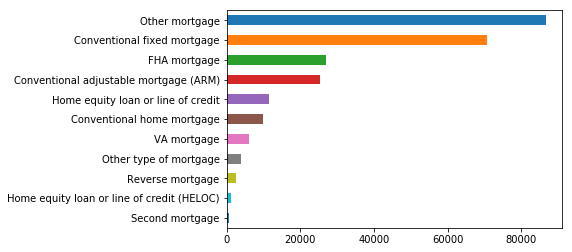

In [14]:
mortgages.plot.barh()
plt.gca().invert_yaxis()
plt.show()

In [15]:
sub_products('Student loan')

Non-federal student loan          22283
Federal student loan servicing    14591
Private student loan               2793
Name: sub_product, dtype: int64

### Complaints by Company

In [16]:
complaints_df['company'].describe()

count            932473
unique             4580
top       EQUIFAX, INC.
freq              73490
Name: company, dtype: object

In [17]:
# Top 10 companies by complaints.
complaints_df.company.value_counts().head(20)

EQUIFAX, INC.                             73490
BANK OF AMERICA, NATIONAL ASSOCIATION     71552
Experian Information Solutions Inc.       61988
WELLS FARGO & COMPANY                     59362
TRANSUNION INTERMEDIATE HOLDINGS, INC.    56546
JPMORGAN CHASE & CO.                      48301
CITIBANK, N.A.                            39259
OCWEN LOAN SERVICING LLC                  25727
CAPITAL ONE FINANCIAL CORPORATION         24353
Navient Solutions, LLC.                   22457
NATIONSTAR MORTGAGE                       17823
SYNCHRONY FINANCIAL                       15581
U.S. BANCORP                              13952
Ditech Financial LLC                      12525
AMERICAN EXPRESS COMPANY                   9849
PNC Bank N.A.                              9618
ENCORE CAPITAL GROUP INC.                  8952
DISCOVER BANK                              7634
HSBC NORTH AMERICA HOLDINGS INC.           7606
SUNTRUST BANKS, INC.                       7031
Name: company, dtype: int64

In [18]:
complaints_df.company.value_counts().mean()

203.5967248908297

In [19]:
complaints_df.company.value_counts().median()

6.0